## Phân tích dữ liệu thu thập được từ page MCK

In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install pandas numpy 

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install facebook_scraper

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
df = pd.read_excel('D:\FinalProject\Data\hoanglongmck.xlsx')

### Bài đăng đầu tiên và cuối cùng của bộ dữ liệu

In [35]:
df['time'].min()

Timestamp('2021-12-08 20:04:02')

In [36]:
df['time'].max()

Timestamp('2023-10-27 18:53:16')

### Tương tác

In [76]:
reac_m=df['reaction_count'].mean()
comments_m=df['comments'].mean()
shares_m=df['shares'].mean()
print("Lượng tương tác trung bình là: ",reac_m)
print("Lượng comment trung bình là: ",comments_m)
print("Lượng share trung bình là: ",shares_m)


Lượng tương tác trung bình là:  15195.186440677966
Lượng comment trung bình là:  451.41525423728814
Lượng share trung bình là:  106.53389830508475


In [77]:
reac_s=df['reaction_count'].sum()
comments_s=df['comments'].sum()
shares_s=df['shares'].sum()
print("Tổng số lượt tương tác là: ",reac_s)
print("Tổng số lượng comment là: ",comments_s)
print("Tổng số lượng share là: ",shares_s)

Tổng số lượt tương tác là:  1793032
Tổng số lượng comment là:  53267
Tổng số lượng share là:  12571


In [78]:
# Tạo 1 cột gồm tổng lượng reaction_count, comments, shares
df['total_reac']=df['reaction_count']+df['comments']+df['shares']

postmax = df.loc[df["total_reac"].idxmax()]

print("Bài viết có tổng lượng tương tác, comment, share lớn nhất:")
print("Post_text: ", postmax["post_text"])
print("Lượt thích:", postmax["reaction_count"])
print("Bình luận:", postmax["comments"])
print("Chia sẻ:", postmax["shares"])
print("Thời gian:",postmax["time"])

Bài viết có tổng lượng tương tác, comment, share lớn nhất:
Post_text:  unknown
Lượt thích: 117348
Bình luận: 2363
Chia sẻ: 46
Thời gian: 2022-05-10 15:57:08


### Các mốc thời gian trong ngày mà page hay đăng bài viết

<Axes: title={'center': 'Số lượng bài viết theo giờ trong ngày'}, ylabel='Số lượng bài viết'>

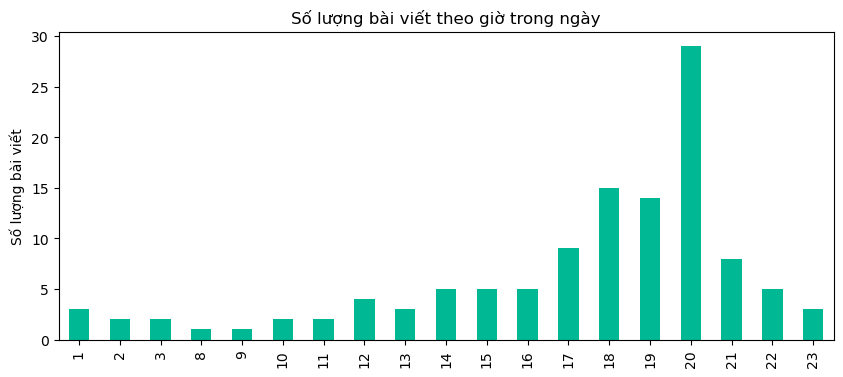

In [11]:
df['Hour']=df['time'].dt.hour
df['Hour'].value_counts().sort_index().plot(kind='bar',figsize=(10,4),color='#00b894',ylabel='Số lượng bài viết',title='Số lượng bài viết theo giờ trong ngày')

### Số lượng tương tác chia theo các ngày trong tuần

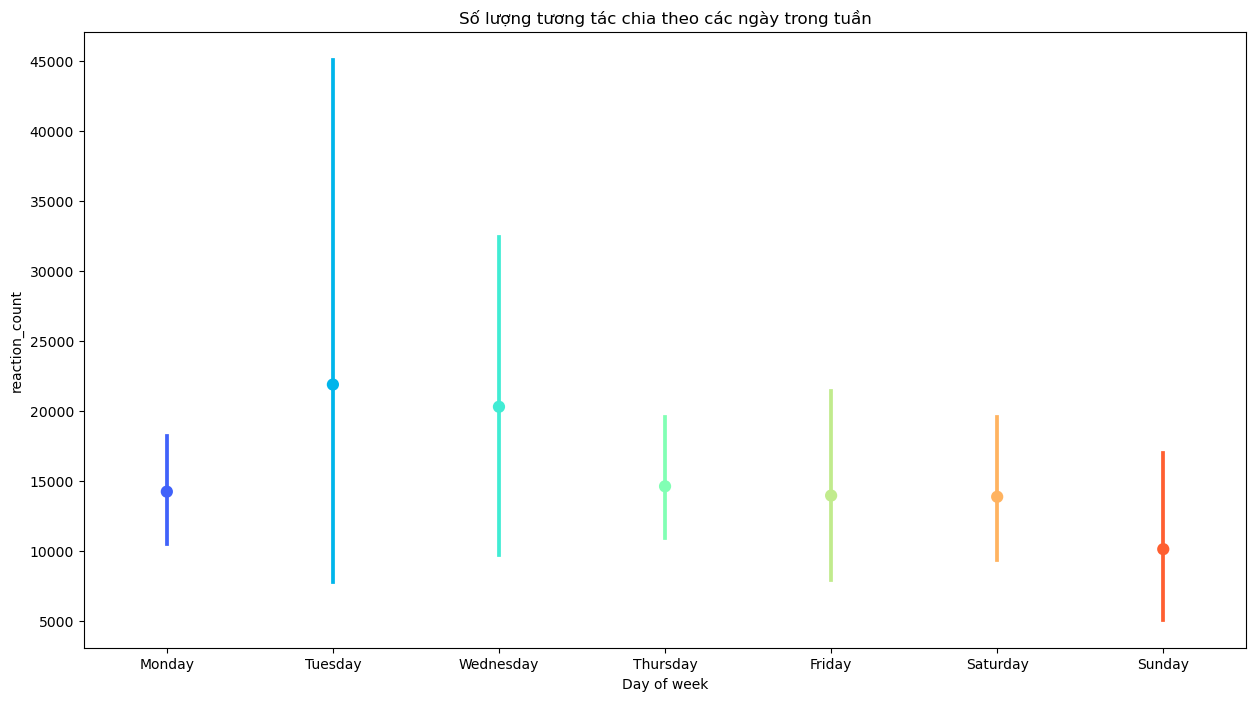

In [50]:
week_day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['week_day']=df['time'].dt.weekday.map(dict(enumerate(week_day_order)))
df['week_day']=pd.Categorical(df['week_day'],categories=week_day_order,ordered=True)

plt.figure(figsize=(15,8))
sns.pointplot(x='week_day',y='reaction_count',data=df,palette='rainbow')
plt.xlabel('Day of week')
plt.title("Số lượng tương tác chia theo các ngày trong tuần")
plt.show()

### Biểu đồ thể hiện lượng reaction_count theo thời gian

C:\Users\ACER\AppData\Local\Temp\ipykernel_6656\1646342190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reac['time'] = pd.to_datetime(df_reac['time'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_6656\1646342190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reac.fillna(0, inplace=True)


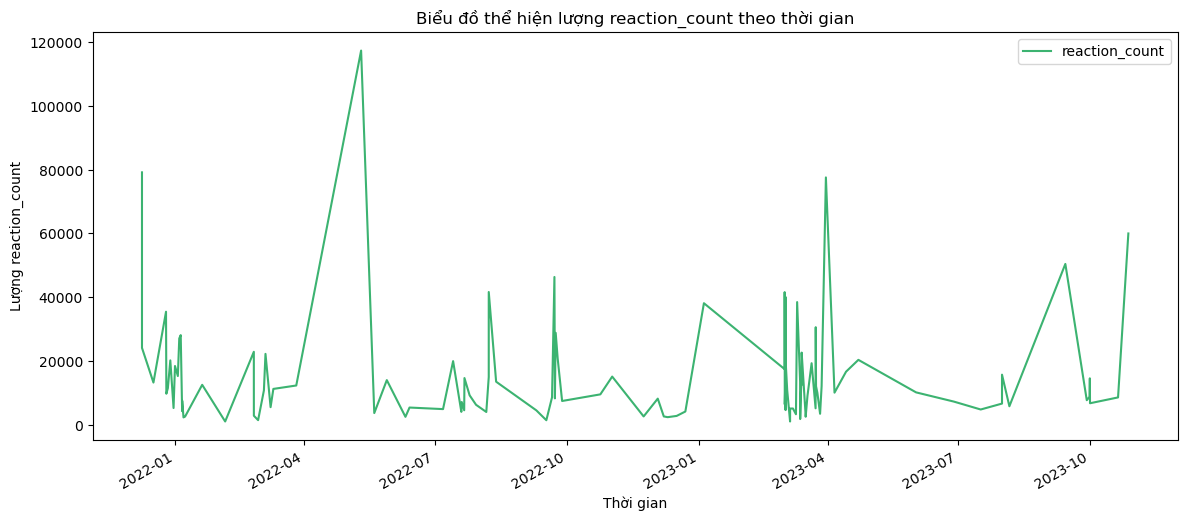

In [59]:
df_reac=df[['time','reaction_count']]

df_reac['time'] = pd.to_datetime(df_reac['time'])
df_reac.set_index('time', inplace=True)
df_reac.fillna(0, inplace=True) 
df_reac.plot(figsize=(14,6),color='#3cb371')
plt.xlabel('Thời gian')
plt.ylabel('Lượng reaction_count')
plt.title('Biểu đồ thể hiện lượng reaction_count theo thời gian')
plt.show()

### Biểu đồ thể hiện từng loại cảm xúc theo thời gian

In [41]:
post_df_full1=df

post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)

for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0


post_df_full_with_reactions[['time','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']]

,time,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương
0,2023-10-27 18:53:16,43662.0,15501.0,235.0,110.0,26.0,2.0,474.0
1,2023-10-20 14:23:37,5375.0,2998.0,26.0,22.0,97.0,2.0,83.0
2,2023-10-01 01:12:53,3640.0,3005.0,34.0,5.0,3.0,1.0,89.0
3,2023-09-30 22:17:57,7547.0,4771.0,2044.0,41.0,23.0,1.0,162.0
4,2023-09-30 17:33:26,5331.0,3322.0,29.0,10.0,4.0,0.0,107.0
...,...,...,...,...,...,...,...,...
113,2021-12-25 20:03:17,8322.0,1364.0,31.0,9.0,5.0,2.0,36.0
114,2021-12-25 14:22:48,30044.0,4782.0,410.0,46.0,62.0,7.0,122.0
115,2021-12-16 19:50:24,11460.0,1662.0,75.0,14.0,10.0,3.0,39.0
116,2021-12-08 20:06:01,19969.0,2542.0,1424.0,49.0,56.0,5.0,86.0


C:\Users\ACER\AppData\Local\Temp\ipykernel_6656\3366293574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions['time'] = pd.to_datetime(emotions['time'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_6656\3366293574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions.fillna(0, inplace=True)


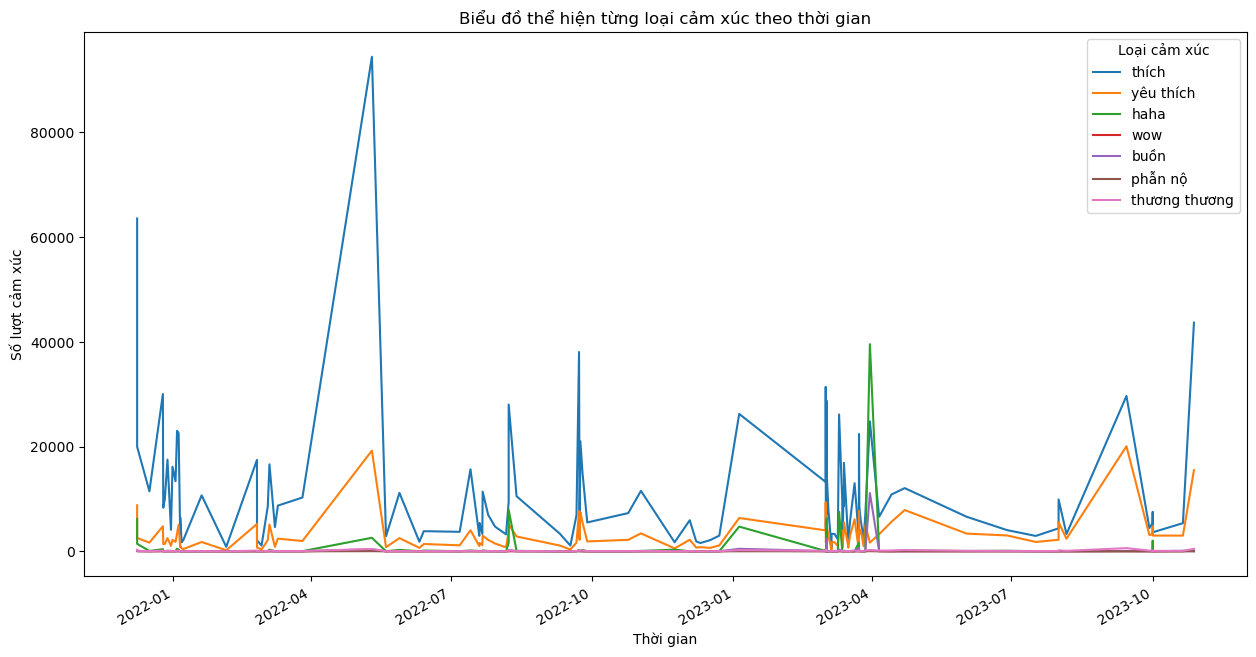

In [57]:
emotions = post_df_full_with_reactions[['time', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']]
emotions['time'] = pd.to_datetime(emotions['time'])
emotions.set_index('time', inplace=True)
emotions.fillna(0, inplace=True)  
emotions.plot(figsize=(15, 8))
plt.title('Biểu đồ thể hiện từng loại cảm xúc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt cảm xúc')
plt.legend(title='Loại cảm xúc')
plt.show()

### Sự tương quan giữa lượng reaction_count,comments và shares

In [166]:
import random

data = df[['reaction_count', 'comments','shares']]
rows = random.sample(data.index.tolist(), 20) 
values = data.loc[rows]
values

,reaction_count,comments,shares
16,77582,7199,2732
58,4182,176,12
23,19326,313,95
72,8639,288,34
39,5773,45,12
87,5431,342,19
36,1057,33,4
93,11273,210,13
76,41653,1447,554
82,4579,123,5


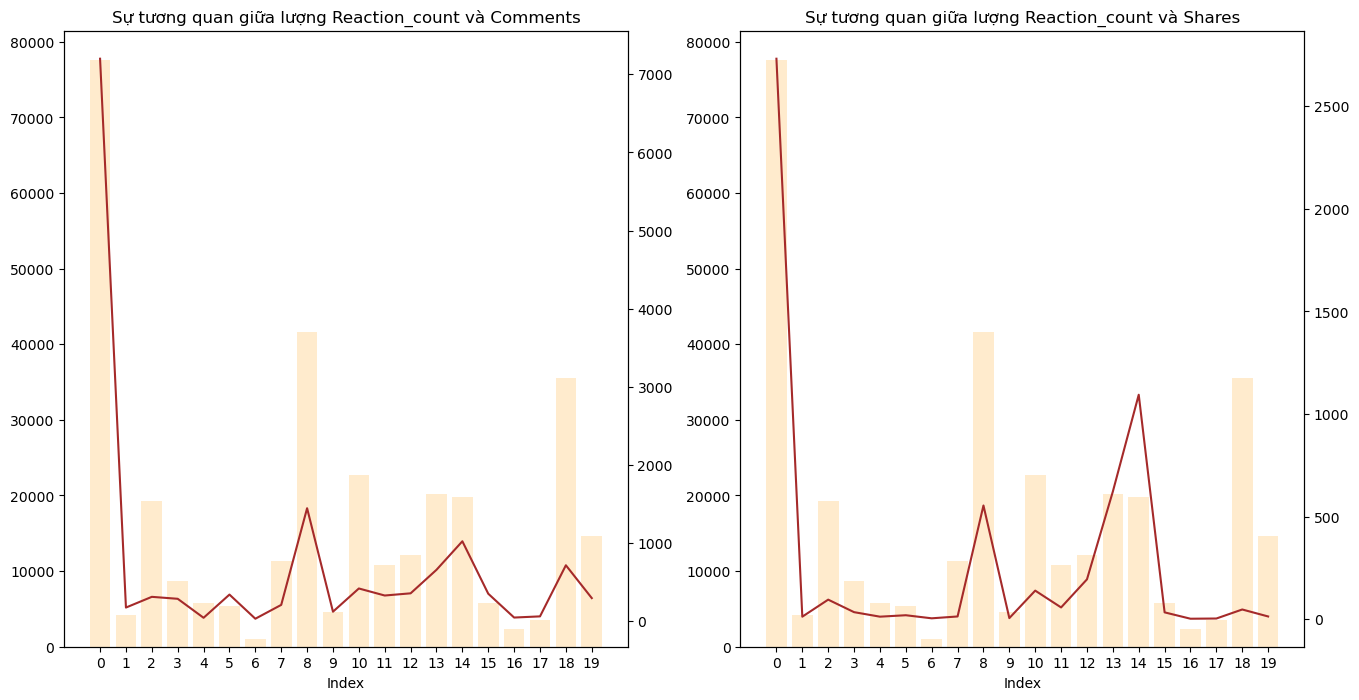

In [173]:

reaction_count = values['reaction_count']
comments = values['comments']
shares=values['shares']
index = np.arange(len(reaction_count))
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1,2,1)
ax1.bar(index, reaction_count, label='Reaction Count',color='#ffebcd')
ax1.set_xlabel('Index')
ax2 = ax1.twinx()
ax2.plot(index, comments, label='Comments',color='#a52a2a')
plt.xticks(index, index)
plt.title('Sự tương quan giữa lượng Reaction_count và Comments')

ax3 = fig.add_subplot(1,2,2)
ax3.bar(index, reaction_count, label='Reaction Count',color='#ffebcd')
ax3.set_xlabel('Index')
ax4 = ax3.twinx()
ax4.plot(index, shares, label='Shares',color='#a52a2a')
plt.title('Sự tương quan giữa lượng Reaction_count và Shares')
plt.xticks(index, index)
plt.show()

### Lượng tương tác của bài viết có ảnh và không có ảnh

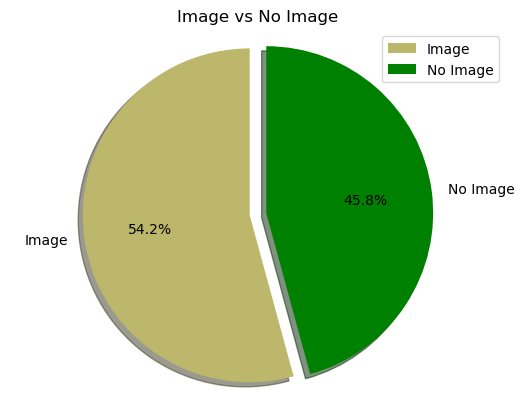

In [86]:
noimage = df['image_id'].value_counts()['unknown']
image=df['image_id'].count()-noimage

labels = ['Image', 'No Image']
sizes = [image,noimage]
colors = ['#bdb76b', '#008000']
myexplode = [0,0.1]

plt.pie(sizes, labels=labels, colors=colors,explode=myexplode,shadow=True,autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Image vs No Image')
plt.legend()
plt.show()

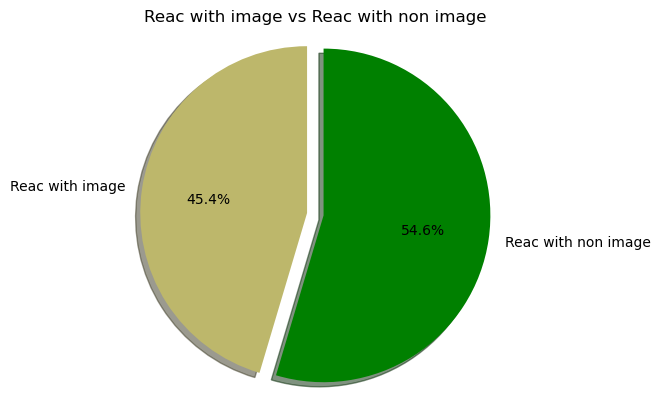

In [89]:
unknown_reaction_count = df.loc[df['image_id'] == 'unknown', 'reaction_count'].sum()
not_unknown_reaction_count = df['reaction_count'].sum()-unknown_reaction_count

labels = ['Reac with image', 'Reac with non image']
sizes = [not_unknown_reaction_count,unknown_reaction_count]
colors = ['#bdb76b', '#008000']
myexplode = [0,0.1]

plt.pie(sizes, labels=labels, colors=colors,explode=myexplode,shadow=True,autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Reac with image vs Reac with non image')
plt.show()

### Các từ thường được xuất hiện trong các bài đăng

In [48]:
text = "" 
for i in post_df_full_with_reactions['post_text']:
  text=text+str(i)+" "
text

'We had arrived!!!\n\nHẹn mọi người tại The Wavy Space vào 29 tháng 10 này ở Praha và Balcony vào 04 tháng 11 ở Berlin nhé! Sáng nay chúng mình đã nhận được thông báo từ đơn vị làm Visa rằng hiện nay do phía Đại sứ quán Đức đang quá tải hồ sơ nên đến sáng nay hộ chiếu của chúng mình vẫn chưa được phía Đại Sứ Quán gửi về. Chúng mình rất lấy làm tiếc khi sẽ chưa thể có mặt ngay tại Berlin vào ngày 21 tháng 10 này.\n\nHiện tại Ban Tổ Chức tại Châu Âu đang cố gắng hết sức nhằm gấp rút thu xếp để rời lịch chương trình đến ngày 28 tháng 10. Bọn mình hy vọng sẽ sớm được quay trở lại Châu Âu trong tuần tới và có thể tiến hành tour diễn!\n\nHẹn sớm gặp lại mọi người tại Berlin. Đài Phát Thanh. Cảm ơn mọi người vì đã đến và chia sẻ năng lượng này với chúng tôi\nCổ Động 99% đã chính thức được tái bản trong một bộ dạng mới. Nếu các bạn đang ở HAY Glamping Music Festival , hãy ghé ngay qua quầy Merchandise của LP Club để sở hữu cho mình một bộ CDs và cùng đón chờ set diễn củaXem thêm mình nhé.\n\n9

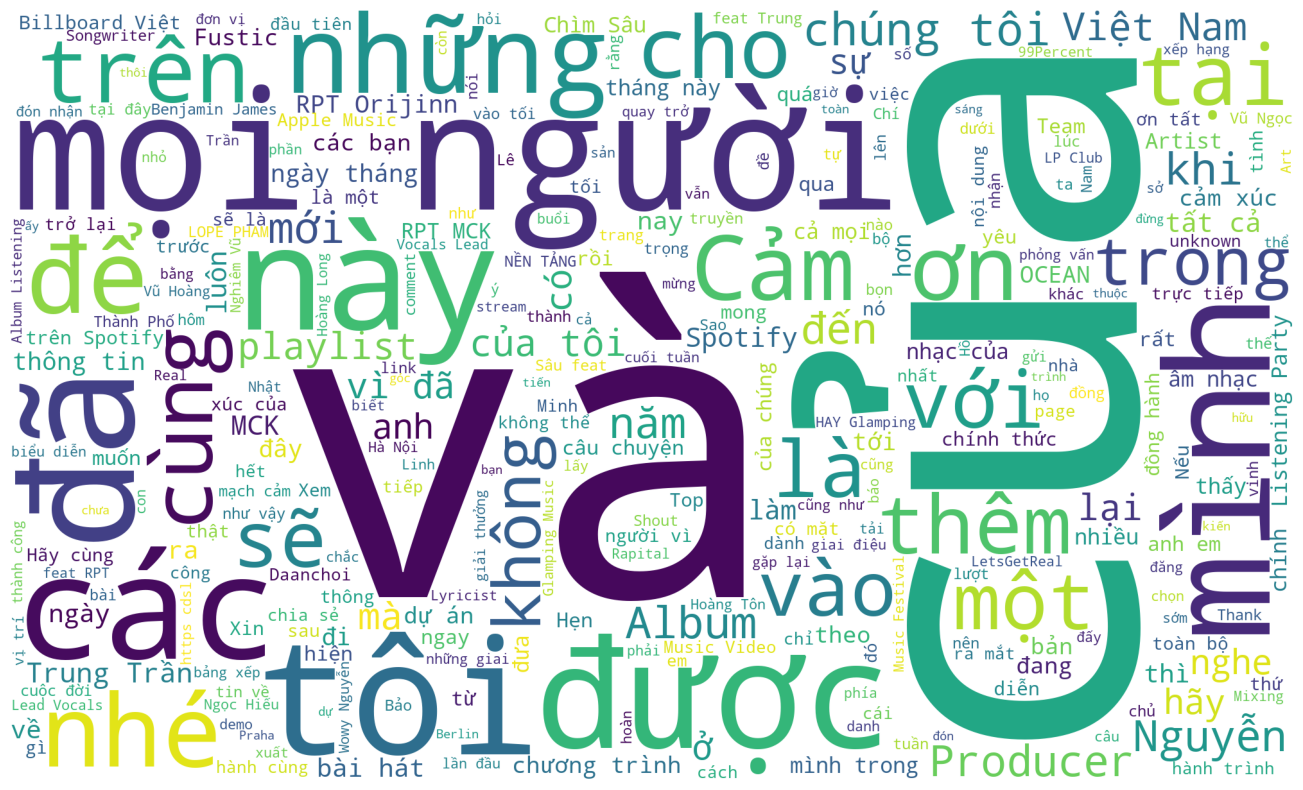

In [49]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(20,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Phân tích comment

In [11]:
import re
import datetime
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [12]:
def creatCommentsFrame(df):
    df_result = {"comment_id" : [],
                 "commenter_id" : [],
                   "comment_text" : [],
                   "comment_time" : [],
                   "commenter_name" : [],
                   "post_id" : []}
    
    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                df_result['comment_id'].append(comment['comment_id'])
                df_result['commenter_id'].append(comment['commenter_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['comment_time'].append(comment['comment_time'])
                df_result['commenter_name'].append(comment['commenter_name'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [13]:
df_cmt = creatCommentsFrame(df)
df_cmt

,comment_id,commenter_id,comment_text,comment_time,commenter_name,post_id
0,1709952336192008,100090707224164,Thu Hà bên e tặng a 88k đnhs lên rút thoải mái...,2023-10-25,Kim Tuyết Nhi,770357611562327
1,701922148519704,100046143795798,Chất,2023-10-25,Nguyễn Trường Giang,770357611562327
2,348181797626366,100090707224164,Huy Minh bên e tặng a 88k đnhs lên rút thoải m...,2023-10-25,Kim Tuyết Nhi,770357611562327
3,264820543225450,100082913951172,Chất nhè=)),2023-11-01,Ng Bao Quyenn,770357611562327
4,299171526252889,100073057487916,chất,2023-10-25,Pham Thuy Trang,770357611562327
...,...,...,...,...,...,...
3401,629475608468062,100066203336902,Huy Nguyên lo làm đề cương đe😭,2021-11-15,Nguyen Huyen Trang,629469308468692
3402,629503628465260,100050252133593,Anh ơi tên Đông lấy nick name sao a MCK,2021-11-15,Dong Hong,629469308468692
3403,629504168465206,100050252133593,Lại Đạt cần nick name bro,2021-11-15,Dong Hong,629469308468692
3404,629604891788467,100040521651933,Dong Hong đông bóng gồng chăng,2021-11-15,Thành Cát,629469308468692


### Người comment nhiều nhất

In [14]:
df_cmt['commenter_name'].value_counts().head(1)

Thu Trang    31
Name: commenter_name, dtype: int64

### Những từ được dùng nhiều nhất trong comment

In [21]:
textcmt = "" 
for i in df_cmt['comment_text']:
  textcmt=textcmt+str(i)+" "
textcmt

'Thu Hà bên e tặng a 88k đnhs lên rút thoải mái. uy tín 100% nhà cái số 1 châu á Chất Huy Minh bên e tặng a 88k đnhs lên rút thoải mái. uy tín 100% nhà cái số 1 châu á Chất nhè=)) chất Trung Duc bên e tặng a 88k đnhs lên rút thoải mái. uy tín 100% nhà cái số 1 châu á Trần Văn Sáng sao ở đâu ra tích xanh thế này =))) Le Dung người lổi tiếnggg Vũ Long Nguyễn sao e bảo diễn rồi Ðôi giây khung long Thítttt siêu thít Vẫn là orijin cùng đôi balen defend của anh ấy Đẹp vl ý https://\nshope.ee/\n4poaF03bQS Vl đẹp trai quá chồng ơi Hihii Anh đẹp trai quá cho em đôi giày đi ạ bảnh wua chú anhhh Longggg 💀 les\'t gooo Bảnh zay=))) Tuấn Anh Balcony Club e nha anh Longggggg 🫰🏻 🫰🏻 🫰🏻 Trà Giang chưa Anh Long mang đôi giày chất thế Ae có ai biết inf về đôi giày của ông Nger k =)) Xin in4 đôi giày thả ttac, hj bay xa v ck... á đù ngon thí Uốt đi cũng diễn ngày đó, nơi đó. Giờ 2 anh k biếc lựa anh nào Thuc Quyenn da 💞 Hà My oke lun 🥹🥰🤗 kh saoo cạ 💨 Hnay bên mình đã có visa chưa ạ :)) để bọn em còn hoàn 

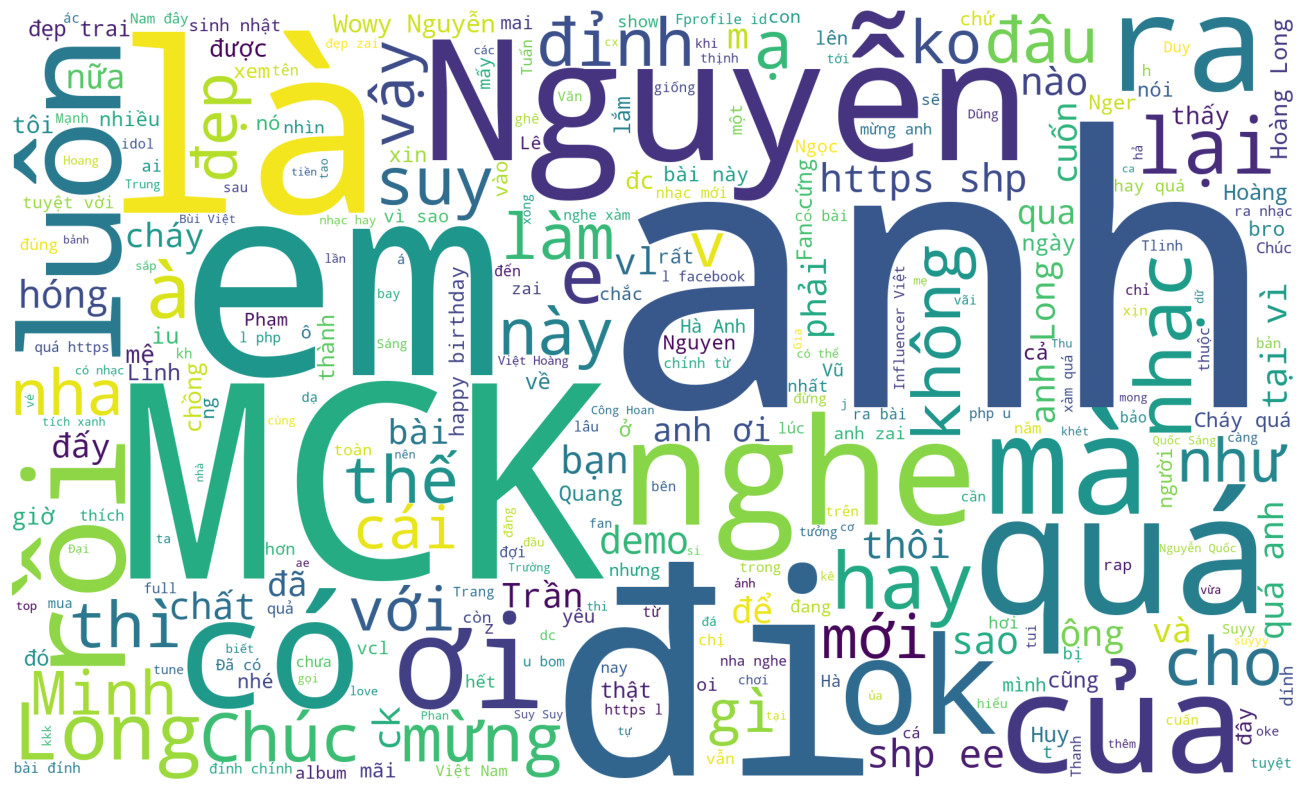

In [22]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(textcmt)
plt.figure(figsize=(20,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Lấy profile của những người đã comment

In [75]:
df_cmt2=df_cmt
list=df_cmt2['commenter_id'].unique()
list

array(['100090707224164', '100046143795798', '100082913951172', ...,
       '100050252133593', '100040521651933', '100070271289970'],
      dtype=object)

In [76]:
from facebook_scraper import get_profile

commenter = []

for i in range(len(list)):
    try:
        x = int(list[i])
        user = get_profile(str(x))
        commenter.append(user)
    except:
        continue


c:\Users\ACER\anaconda3\Lib\site-packages\facebook_scraper\facebook_scraper.py:855: UserWarning: Facebook language detected as vi_VN - for best results, set to en_US
  warnings.warn(


In [77]:
commenter

[{'Friend_count': None,
  'Follower_count': None,
  'Following_count': None,
  'cover_photo': 'https://scontent.fhan14-4.fna.fbcdn.net/v/t39.30808-6/332526072_747582050002800_8744200968359293975_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=ff2d77&_nc_ohc=mkKcz3qkZA0AX8q3PWf&_nc_ht=scontent.fhan14-4.fna&oh=00_AfA_kpUsfvXoem8ttTyG-DHlmT6NZV8AsrftlBOe3ARxlg&oe=6573395E',
  'profile_picture': 'https://scontent.fhan14-3.fna.fbcdn.net/v/t39.30808-1/332352308_926589642030521_2023646993012481006_n.jpg?stp=cp0_dst-jpg_e15_p120x120_q65&_nc_cat=104&ccb=1-7&_nc_sid=4da83f&_nc_ohc=6se7il8uZlsAX_PIsI0&_nc_ht=scontent.fhan14-3.fna&oh=00_AfAZHZijZOdfGd0W3OutfICELINAhNwiHhfORnFgSwJWig&oe=6572FF44',
  'id': '100090707224164',
  'Name': 'Kim Tuyết Nhi',
  'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại\nThành phố Hồ Chí Minh\nQuê quán'},
 {'Friend_count': None,
  'Follower_count': None,
  'Following_count': None,
  'cover_photo': 'https://scontent.fhan14-3.fna.fbcdn.net/v

In [105]:
# Initialize dataframe to scrape Facebook post
FOLDER_PATH = "Data/"
post_df_full = pd.DataFrame(columns=commenter[2].keys(), index=range(len(commenter)), data=commenter)

# To df
path=FOLDER_PATH + 'user' + ".xlsx"
post_df_full.to_excel(path, index=False)
print(path)

Data/user.xlsx


In [109]:
df_user = pd.read_excel(r'D:\FinalProject\Data\user.xlsx')

In [110]:
df_user['Học vấn']

0                                                    NaN
1                                                    NaN
2      Trường THCS Võ Trường Toản-Biên Hòa, Đồng Nai\...
3                 Trường THPT Chí Linh\nTrường trung học
4                                                    NaN
                             ...                        
397                                                  NaN
398                                                  NaN
399                                                  NaN
400    Trường Cao Đẳng Công Thương Hà Nội\nQuản trị k...
401                                                  NaN
Name: Học vấn, Length: 402, dtype: object

### Trình độ học vấn của những người comment

In [111]:
def cleanEdu(edu):
  if isinstance(edu, str):  
    if 'THPT' in edu:
        return 'THPT'
    elif 'Đại học' in edu:
        return 'Đại học'
    elif 'THCS' in edu or 'Trung học cơ sở' in edu:
        return 'THCS'
    elif 'Cao đẳng' in edu:
        return 'Cao đẳng'
    elif 'University' in edu:
        return 'Đại học'
    else:
        return 'Khác'  

df_user['Học vấn new'] = df_user['Học vấn'].apply(cleanEdu)
df_user.dropna(subset=['Học vấn new'], inplace=True)
df_user['Học vấn new']

2         THCS
3         THPT
15        THPT
16        Khác
17        THPT
        ...   
386    Đại học
388    Đại học
389    Đại học
394       THPT
400       THPT
Name: Học vấn new, Length: 148, dtype: object

In [119]:
print('Khác: ',df_user['Học vấn new'][df_user['Học vấn new'] == 'Khác'].count())
print('THPT: ',df_user['Học vấn new'][df_user['Học vấn new'] == 'THPT'].count())
print('THCS: ',df_user['Học vấn new'][df_user['Học vấn new'] == 'THCS'].count())
print('Đại học: ',df_user['Học vấn new'][df_user['Học vấn new'] == 'Đại học'].count())
print('Cao đẳng: ',df_user['Học vấn new'][df_user['Học vấn new'] == 'Cao đẳng'].count())

Khác:  11
THPT:  75
THCS:  14
Đại học:  48
Cao đẳng:  0


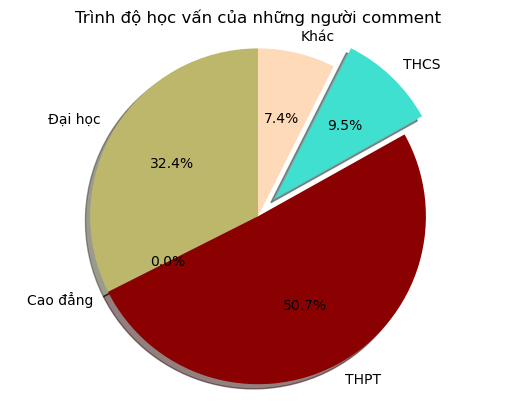

In [124]:
Khac=df_user['Học vấn new'][df_user['Học vấn new'] == 'Khác'].count()
thpt=df_user['Học vấn new'][df_user['Học vấn new'] == 'THPT'].count()
thcs=df_user['Học vấn new'][df_user['Học vấn new'] == 'THCS'].count()
ĐH=df_user['Học vấn new'][df_user['Học vấn new'] == 'Đại học'].count()
CĐ=df_user['Học vấn new'][df_user['Học vấn new'] == 'Cao đẳng'].count()


labels = ['Đại học', 'Cao đẳng','THPT','THCS','Khác']
sizes = [ĐH,CĐ,thpt,thcs,Khac]
colors = ['#bdb76b', '#008000','#8b0000','#40e0d0','#ffdab9']
myexplode = [0,0,0,0.15,0]

plt.pie(sizes, labels=labels, colors=colors,explode=myexplode,shadow=True,autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Trình độ học vấn của những người comment')
plt.show()